In [1]:
# %% libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data


In [3]:
data = pd.read_csv('C:\\Users\\DKici\\Documents\\PricingPromo\\data\\Promo_Pricing_Combined_Data\\pricing_promo_2019_2021_campaign_sales_with_NO_dates.csv')
data = data.drop(columns = "Unnamed: 0")
data.head(2)

,Event_detailed,Event,Start Date,End Date_x,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,...,Wrap,$X off with $Y,X% on orders over $Y,$X off over $Y,End Date_y,WrittenSales,Margin,Traffic,FinancedAmount,StoreOpen
0,Anniversary Sale,Anniversary Sale,2019-03-01,2019-03-03,0,0,0,0,0,0,...,0,0,0,0,2019-03-03,1607366.15,716008.37,8670.5,14346719.37,83
1,Anniversary Sale,Anniversary Sale,2019-03-04,2019-03-07,0,0,0,0,0,0,...,0,0,0,0,2019-03-07,937083.51,419880.93,6079.0,9833126.17,115


In [4]:
data = data.drop(["Event_detailed", "Event", "Start Date","End Date_x","End Date_y"], axis = 1)
data

,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,off HomeStore Specials?,...,Week 5,Wrap,$X off with $Y,X% on orders over $Y,$X off over $Y,WrittenSales,Margin,Traffic,FinancedAmount,StoreOpen
0,0,0,0,0,0,0,1,0,25,0,...,0,0,0,0,0,1607366.15,716008.37,8670.5,14346719.37,83
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,937083.51,419880.93,6079.0,9833126.17,115
2,0,0,0,0,1,40,1,0,40,0,...,0,0,0,0,0,2218800.94,1048347.13,9561.5,16902311.04,86
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,982785.83,455653.17,7402.0,18281016.48,115
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,974771.21,460666.48,2494.0,6064197.22,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,860898.82,419782.02,5039.5,12495296.69,88
215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3003384.68,1513783.00,12173.5,26327190.78,148
216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5021356.98,2402049.94,19536.0,62348450.27,263
217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5881379.59,2814172.13,15140.5,38915036.23,94


In [5]:
data.isna().sum().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 81 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Amount of Employee pricing % off                           219 non-null    int64  
 1   off Particular Item?                                       219 non-null    int64  
 2   Amount of % Off Particular Item                            219 non-null    int64  
 3   Location Specific?                                         219 non-null    int64  
 4   off 1st item?                                              219 non-null    int64  
 5   Amount of % off 1st item                                   219 non-null    int64  
 6   off conditional?                                           219 non-null    int64  
 7   Amount of $ off conditional                                219 non-null    int64  
 8   Amount of 

In [7]:
feature = "Traffic"
# print(data[feature])

In [9]:
data.Traffic.max(),data.Traffic.min()

(29052.0, 271.0)

In [10]:
data[feature] = pd.to_numeric(data[feature], errors='coerce') 
# print(data.info())
data[feature] 

0       8670.5
1       6079.0
2       9561.5
3       7402.0
4       2494.0
        ...   
214     5039.5
215    12173.5
216    19536.0
217    15140.5
218    14972.5
Name: Traffic, Length: 219, dtype: float64

In [11]:
data[feature].describe()

count      219.000000
mean      8139.132420
std       6461.966481
min        271.000000
25%       2859.250000
50%       6430.000000
75%      12532.750000
max      29052.000000
Name: Traffic, dtype: float64

In [15]:
data["Traffic_groups"]= pd.qcut(data[feature],10)
data["Traffic_groups"].unique().sort_values()

[(270.999, 1730.9], (1730.9, 2374.6], (2374.6, 3519.1], (3519.1, 4897.5], (4897.5, 6430.0], (6430.0, 7786.5], (7786.5, 10903.2], (10903.2, 13512.6], (13512.6, 17180.8], (17180.8, 29052.0]]
Categories (10, interval[float64]): [(270.999, 1730.9] < (1730.9, 2374.6] < (2374.6, 3519.1] < (3519.1, 4897.5] ... (7786.5, 10903.2] < (10903.2, 13512.6] < (13512.6, 17180.8] < (17180.8, 29052.0]]

In [24]:
bins = [0,1800,2500, 3500,5000, 6500, 8000, 10000, 14000, 18000, 30000]
names = list(range(1,11))

In [25]:
names

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [26]:
data["Range"] = pd.cut(data[feature], bins, labels=names)

data["Range"] = pd.Categorical(data["Range"]) 
print(data["Range"].unique())

[7, 5, 6, 2, 1, 4, 3, 8, 9, 10]
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]


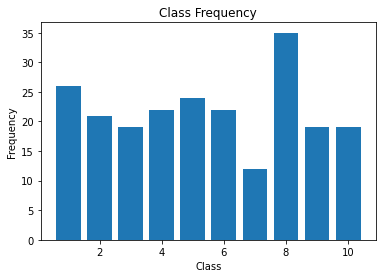

In [27]:
unique, counts = np.unique(data["Range"], return_counts=True)
plt.bar(unique, counts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

In [32]:
data[feature].max(), data[feature].min()

(29052.0, 271.0)

In [29]:
data.isna().sum().sum()

0

In [30]:
# data = data.dropna()
# data.isna().sum().sum()

In [33]:
data[["Traffic", "Range"]]

,Traffic,Range
0,8670.5,7
1,6079.0,5
2,9561.5,7
3,7402.0,6
4,2494.0,2
...,...,...
214,5039.5,5
215,12173.5,8
216,19536.0,10
217,15140.5,9


In [34]:
print(data["Range"].unique())

[7, 5, 6, 2, 1, 4, 3, 8, 9, 10]
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]


In [35]:
data.head(1)

,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,off HomeStore Specials?,...,$X off with $Y,X% on orders over $Y,$X off over $Y,WrittenSales,Margin,Traffic,FinancedAmount,StoreOpen,Traffic_groups,Range
0,0,0,0,0,0,0,1,0,25,0,...,0,0,0,1607366.15,716008.37,8670.5,14346719.37,83,"(7786.5, 10903.2]",7


# Train - Test Split

In [36]:
y = data.Range.astype(int).values

X = data.iloc[:,:-7].values

X_df = data.iloc[:,:-7].copy()

In [37]:
y.shape,X.shape

((219,), (219, 76))

In [49]:
# # %% train test split
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

In [50]:
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Training target statistics: Counter({8: 22, 9: 18, 5: 18, 4: 16, 1: 16, 10: 15, 3: 15, 2: 13, 6: 12, 7: 8})
Testing target statistics: Counter({8: 13, 1: 10, 6: 10, 2: 8, 4: 6, 5: 6, 3: 4, 7: 4, 10: 4, 9: 1})
Number transactions X_train dataset:  (153, 76)
Number transactions y_train dataset:  (153,)
Number transactions X_test dataset:  (66, 76)
Number transactions y_test dataset:  (66,)


## Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Oversampling

In [52]:
# from imblearn.over_sampling import SMOTE

# print("Before OverSampling, counts of labels': {}".format(Counter(y_train)))

# oversample = SMOTE()
# X_train_res, y_train_res = oversample.fit_resample(X_train, y_train.ravel())

In [53]:
# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

# print("After OverSampling, counts of label '1': {}".format(Counter(y_train_res)))

In [54]:
data[feature].max(),data["Range"].max()

(29052.0, 10)

## Applying PCA

In [55]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 2)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# Grid Search - Imbalance

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [57]:
X_train

array([[-0.1405071 , -0.27832497, -0.26181267, ..., -0.11508707,
        -0.08111071, -0.08111071],
       [-0.1405071 , -0.27832497, -0.26181267, ..., -0.11508707,
        -0.08111071, -0.08111071],
       [-0.1405071 , -0.27832497, -0.26181267, ..., -0.11508707,
        -0.08111071, -0.08111071],
       ...,
       [-0.1405071 , -0.27832497, -0.26181267, ..., -0.11508707,
        -0.08111071, -0.08111071],
       [-0.1405071 , -0.27832497, -0.26181267, ..., -0.11508707,
        -0.08111071, -0.08111071],
       [-0.1405071 , -0.27832497, -0.26181267, ..., -0.11508707,
        -0.08111071, -0.08111071]])

In [58]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train) 

prediction = dt.predict(X_test)
print(" {} nn score: {} ".format(3,dt.score(X_test,y_test)))

 3 nn score: 0.18181818181818182 


In [59]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [60]:
param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5), 
    "max_features": range(1,len(X_df.columns)) # n_features_selected
}

In [61]:
clf = GridSearchCV(dt, 
                   param_grid = param_dict,
                   cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, y_train.ravel())


Fitting 5 folds for each of 48600 candidates, totalling 243000 fits


C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.14365591 0.15032258 ... 0.16365591 0.16365591 0.16365591]
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': range(1, 76),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=5)

In [62]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 65,
 'min_samples_leaf': 1,
 'min_samples_split': 7}

In [63]:
clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=65,
                       min_samples_split=7)

In [64]:
dt1 = DecisionTreeClassifier(**clf.best_params_)

dt1.fit(X_train, y_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=65,
                       min_samples_split=7)

In [65]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [66]:
# X_train = X_train_res.T
# X_test = X_test.T
# y_train = y_train_res.T
# y_test = y_test.T

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (153, 76)
X_test:  (66, 76)
y_train:  (153,)
y_test:  (66,)


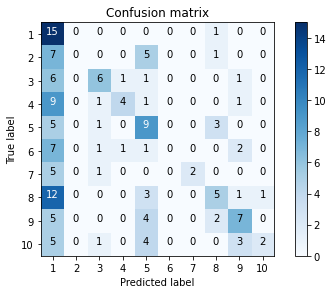

In [67]:
y_train_pre = dt1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)
class_names =  ["1","2","3","4","5","6","7","8","9","10"]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

In [68]:
print(classification_report(y_train, dt1.predict(X_train)))

              precision    recall  f1-score   support

           1       0.20      0.94      0.33        16
           2       0.00      0.00      0.00        13
           3       0.55      0.40      0.46        15
           4       0.67      0.25      0.36        16
           5       0.32      0.50      0.39        18
           6       0.00      0.00      0.00        12
           7       1.00      0.25      0.40         8
           8       0.42      0.23      0.29        22
           9       0.47      0.39      0.42        18
          10       0.67      0.13      0.22        15

    accuracy                           0.33       153
   macro avg       0.43      0.31      0.29       153
weighted avg       0.41      0.33      0.30       153



C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


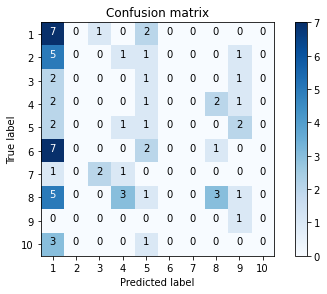

In [69]:
y_pre = dt1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)
# Plot non-normalized confusion matrix
class_names = ["1","2","3","4","5","6","7","8","9","10"]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [70]:
print(classification_report(y_test, dt1.predict(X_test)))

              precision    recall  f1-score   support

           1       0.21      0.70      0.32        10
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         6
           5       0.10      0.17      0.12         6
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         4
           8       0.50      0.23      0.32        13
           9       0.14      1.00      0.25         1
          10       0.00      0.00      0.00         4

    accuracy                           0.18        66
   macro avg       0.09      0.21      0.10        66
weighted avg       0.14      0.18      0.13        66



C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DKici\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
type(str(list(range(1,11))))

str

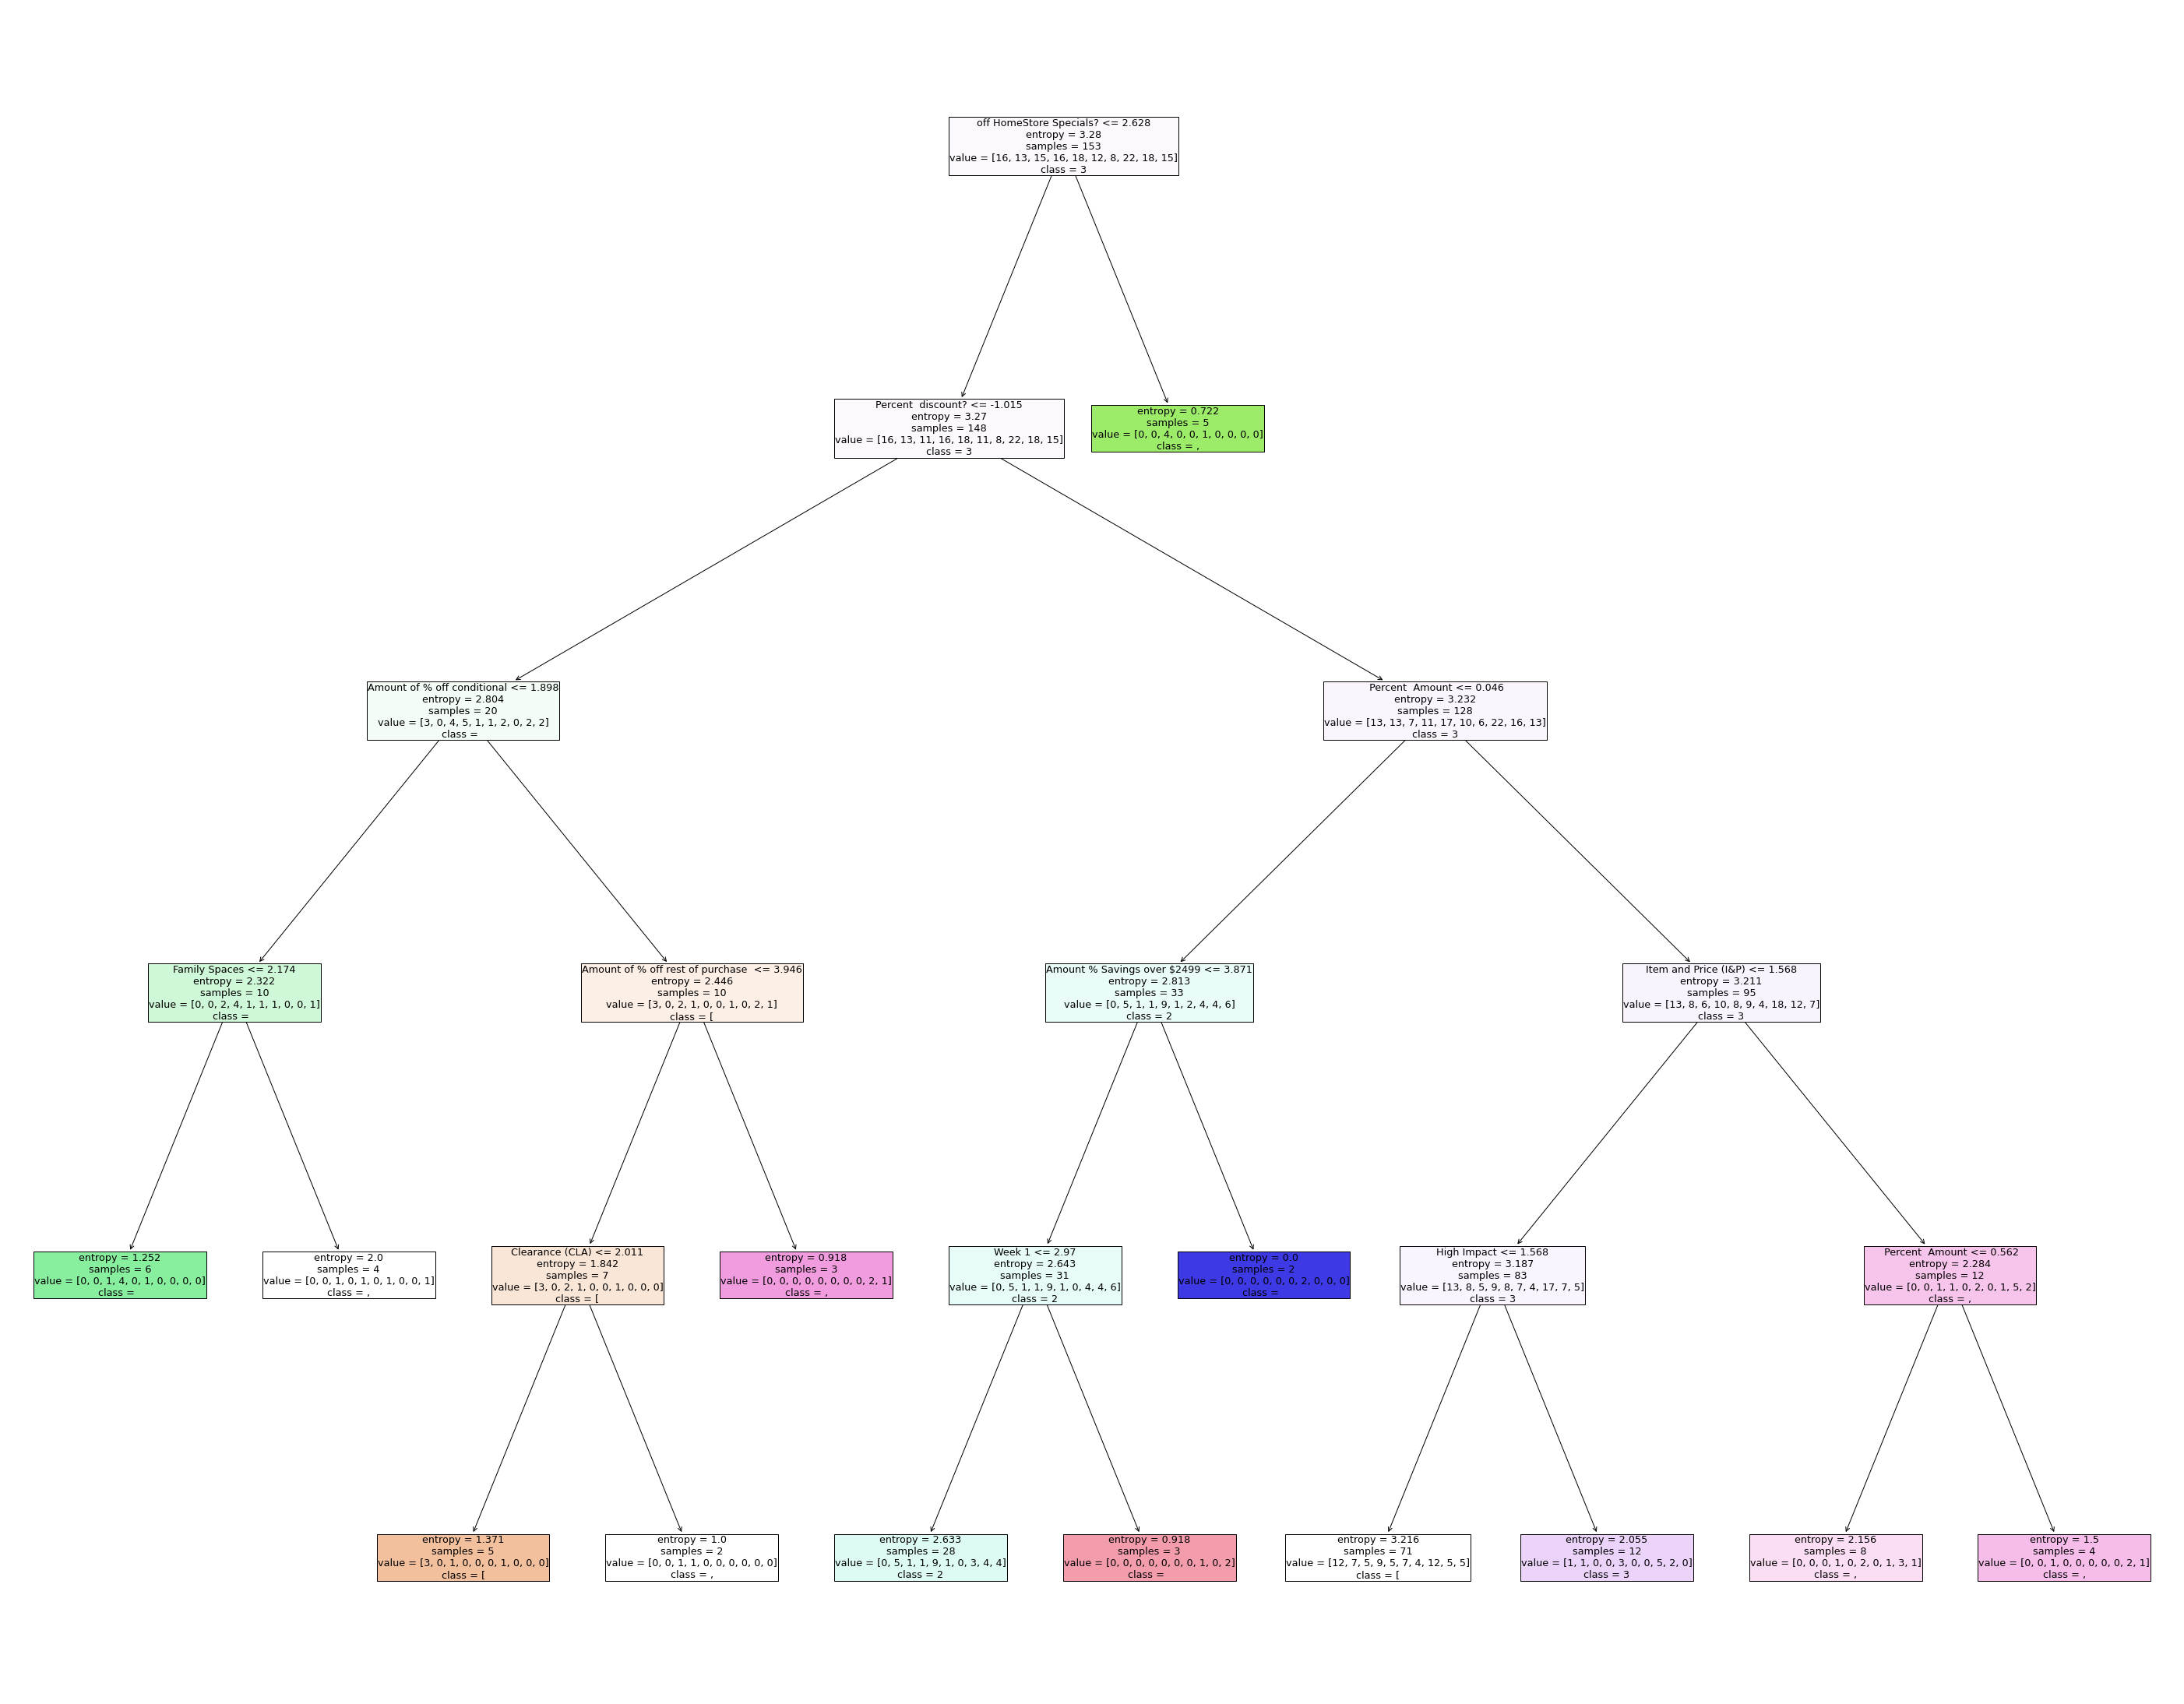

In [72]:
# Set default font size
from sklearn import tree

plt.rcParams['font.size'] = 50
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(dt1, 
                   feature_names=data.columns,
                   class_names=str(list(range(1,11))),
                   filled=True)

In [73]:
# fig.savefig("decision_tree.png")

In [74]:
importances = pd.DataFrame({'feature':X_df.columns,'importance':np.round(dt1.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
57,Percent Amount,0.169
9,off HomeStore Specials?,0.120
58,Percent discount?,0.120
49,Item and Price (I&P),0.111
48,High Impact,0.097
...,...,...
26,Financing?,0.000
25,Amount of % Off OTB(occasional tables),0.000
24,off OTB (occasional tables)?,0.000
23,Amount of % Off JUV,0.000


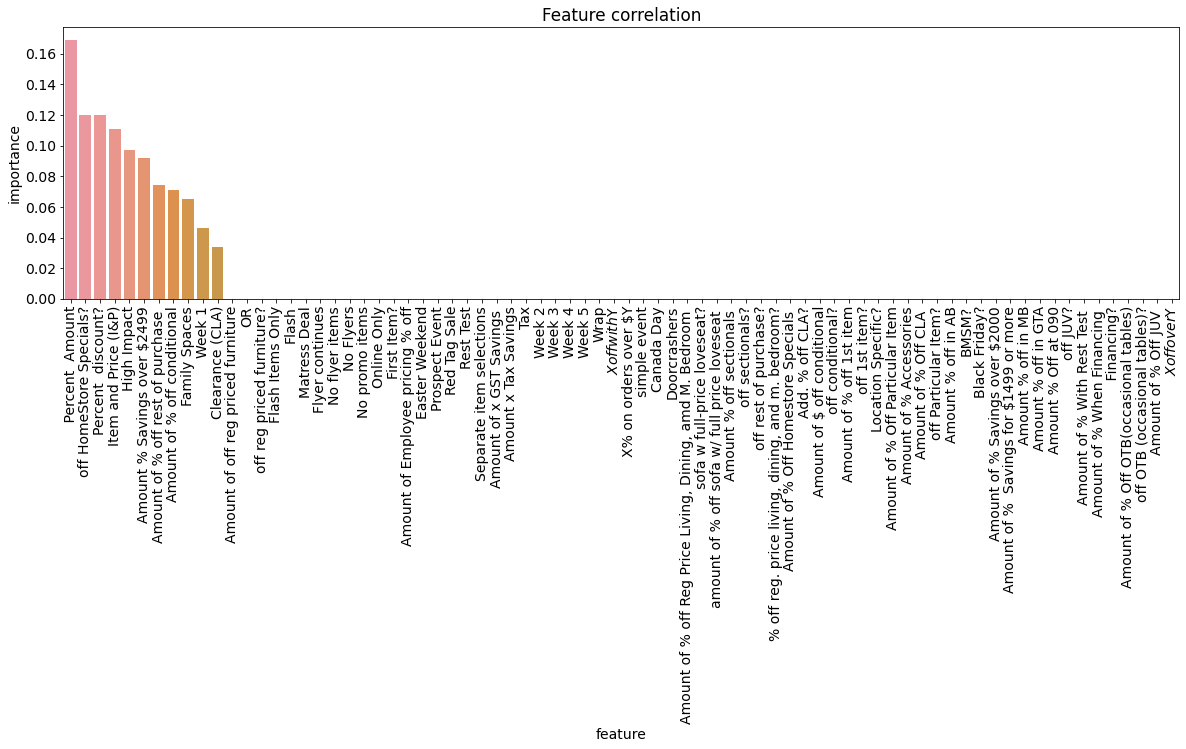

In [75]:
# Set default font size
plt.rcParams['font.size'] = 14

plt.figure(figsize = (20,5))
sns.set_palette('mako')
plt.xticks(rotation = 90)
plt.title('Feature correlation')
sns.barplot (data = importances, x = "feature", y = 'importance');